In [ ]:
# setup 
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
def load_spam_data(dataframe):
    dataframe = pd.read_csv(dataframe,delim_whitespace = False, header = None)
    dataframe = dataframe.replace("?", np.NAN)
    dataframe = dataframe.values

#Split the data into spam and non_spam datasets, such that the training and testing subset contains the same amount of spam and non_spam data    
    not_spam, spam = np.split(dataframe, np.where(np.diff(dataframe[:,57]))[0]+1)
    train_ns_emails = not_spam[:1500]
    test_ns_emails = not_spam[1500:]
    train_s_emails = spam[:2500]
    test_s_emails = spam[2500:]
    train_data = np.vstack([train_ns_emails, train_s_emails])[:,:57]
    test_data = np.vstack([test_ns_emails, test_s_emails])[:,:57]
    train_labels = np.vstack([train_ns_emails, train_s_emails])[:,57]
    test_labels = np.vstack([test_ns_emails, test_s_emails])[:,57]
    return (train_data,train_labels),(test_data, test_labels)

In [ ]:
#Load spambase data and split into training and testing set
(train_emails,train_labels),(test_emails,test_labels) = load_spam_data("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [ ]:
print(train_emails.shape)
print(test_emails.shape)

(4000, 57)
(601, 57)


In [ ]:
#Find the mean and Standard deviation of training emails 
# The data can be normalized by subtracting the mean (µ) of each feature and a division by the standard deviation (σ). 
mean = train_emails.mean(axis = 0)
std = train_emails.std(axis=0)
train_emails = train_emails-mean
train_emails = train_emails/std
test_emails = test_emails-mean
test_emails = test_emails/std

In [ ]:
x_val = train_emails[:500]
partial_x_train = train_emails[500:]

y_val = train_labels[:500]
partial_y_train = train_labels[500:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=RMSprop(learning_rate=0.001),loss="binary_crossentropy",metrics=["binary_accuracy"])

In [ ]:
# train the model using fit() function for partial training data with a batch 	size of 32 and 50 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=32,
                   validation_data=(x_val,y_val))

Epoch 1/50
110/110 [==============================] - 1s 3ms/step - loss: 0.4460 - binary_accuracy: 0.8177 - val_loss: 0.5874 - val_binary_accuracy: 0.6700
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 0.2395 - binary_accuracy: 0.9111 - val_loss: 0.4452 - val_binary_accuracy: 0.8160
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1811 - binary_accuracy: 0.9343 - val_loss: 0.4036 - val_binary_accuracy: 0.8600
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1579 - binary_accuracy: 0.9431 - val_loss: 0.3838 - val_binary_accuracy: 0.8760
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1456 - binary_accuracy: 0.9486 - val_loss: 0.3721 - val_binary_accuracy: 0.8760
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1363 - binary_accuracy: 0.9526 - val_loss: 0.4007 - val_binary_accuracy: 0.8740
Epoch 7/50
110/110 [==============================] - 0s 1ms/ste

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

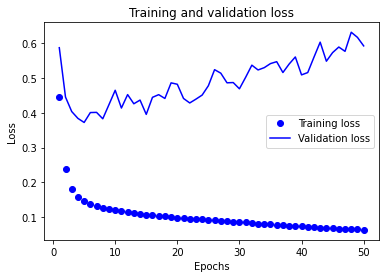

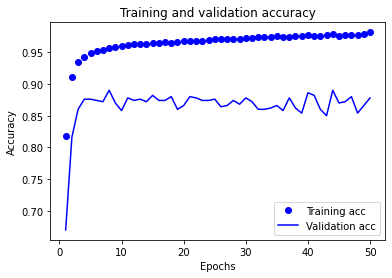

In [ ]:
#plot training and validation loss with respect to epochs

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(16,activation='relu',input_shape=(train_emails.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"])

history = model.fit(train_emails,
                    train_labels,
                    epochs=30,
                    batch_size=512)
results = model.evaluate(test_emails,test_labels)
results

Epoch 1/30
8/8 [==============================] - 1s 2ms/step - loss: 0.6458 - binary_accuracy: 0.5965
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5854 - binary_accuracy: 0.6963
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5427 - binary_accuracy: 0.7555
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.5046 - binary_accuracy: 0.7985
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4691 - binary_accuracy: 0.8280
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4358 - binary_accuracy: 0.8558
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.4038 - binary_accuracy: 0.8777
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3740 - binary_accuracy: 0.8900
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3462 - binary_accuracy: 0.8960
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.

[0.48054608702659607, 0.861896812915802]

In [ ]:
model.save('spam_classify.hdf5')
model.load_weights('spam_classify.hdf5')
model.predict(test_emails)

array([[9.96833682e-01],
       [9.94913816e-01],
       [9.75961566e-01],
       [8.79657030e-01],
       [5.74954867e-01],
       [9.96901989e-01],
       [6.01654947e-02],
       [9.63373542e-01],
       [9.26496148e-01],
       [9.87865806e-01],
       [9.94332731e-01],
       [2.78819233e-01],
       [9.99407649e-01],
       [9.85891461e-01],
       [9.54867482e-01],
       [9.87814248e-01],
       [5.15568078e-01],
       [2.75216848e-01],
       [8.71135831e-01],
       [6.54829144e-01],
       [7.95298040e-01],
       [3.28316092e-02],
       [2.60351479e-01],
       [9.92155790e-01],
       [7.95298040e-01],
       [8.79356265e-01],
       [9.17894721e-01],
       [9.84350443e-01],
       [9.87972915e-01],
       [9.86758113e-01],
       [9.16498005e-01],
       [9.59986806e-01],
       [9.99999762e-01],
       [3.19128633e-01],
       [9.74873900e-01],
       [7.14554667e-01],
       [9.87388909e-01],
       [7.14554667e-01],
       [9.65850472e-01],
       [9.96887922e-01],
